In [67]:
import pandas as pd
import numpy as np
%pylab inline

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


# Reading the data 

In [68]:
import glob

In [69]:
path = 'results_date/'

In [70]:
def sample_type(string):
    if ('Std' in string) or ('STD' in string) or ('std' in string):
        return 'Std'
    if ('Blank' in string) or ('blank' in string):
        return 'Blank'
    if ('MHPool' in string) or ('MHPOOL' in string) or ('MHpool' in string):
        return 'MHPool'
    if ('SAPool' in string) or ('SAPOOL' in string) or ('SApool' in string):
        return 'SAPool'
    if 'ATCC' in string:
        return 'ATCC'
    return 'Bi'

files = sort(glob.glob(path + '*_vr_*.csv'))


# remove peaks with very low intensity
def turn_to_0(value1, value2):
    if value2 > 0.5:
        return 0
    return value1


files = sort(glob.glob(path + '*_vr_*.csv'))
dat_value = []
dat_conc = []
dat_inrange = []
dat_out = []
for file in files:
    d0 = pd.read_csv(file)
    datai = d0 #.set_index(['peak_label', 'ms_file'])['value'].unstack('peak_label').reset_index()
    datai['Date'] = datai.ms_file.apply(lambda x: re.findall(r'_(\d{6})', x)[0])
    datai['Col'] = datai.ms_file.apply(lambda x: 'Col'+ re.findall(r'Col(\d{2})', x)[0])
    datai['SType'] = datai.ms_file.apply(lambda x: sample_type(x))
    datai['Batch'] = datai.ms_file.apply(lambda x: x[:5])
    
    
    dat_value.append(datai)

In [71]:
dat_value[0]

,ms_file,peak_label,value,pred_conc,in_range,Date,Col,SType,Batch
0,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00001_SG...,Acetoacetate,38769.562500,0.283403,1.0,210824,Col01,Blank,SA017
1,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00002_SG...,Acetoacetate,5523.935547,0.040380,0.0,210824,Col01,Blank,SA017
2,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00003_SG...,Acetoacetate,4875.492676,0.035640,0.0,210824,Col01,Blank,SA017
3,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00004_SG...,Acetoacetate,5282.085449,0.038612,0.0,210824,Col01,Blank,SA017
4,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00005_A1...,Acetoacetate,8921.168945,0.065213,0.0,210824,Col01,Std,SA017
...,...,...,...,...,...,...,...,...,...
8003,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00100_H0...,Xanthosine,16117.060547,0.010600,1.0,210824,Col01,Bi,SA017
8004,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00101_H0...,Xanthosine,13682.370117,0.008999,1.0,210824,Col01,Bi,SA017
8005,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00102_H1...,Xanthosine,19355.902344,0.012730,1.0,210824,Col01,Bi,SA017
8006,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00103_B1...,Xanthosine,21256.923828,0.013981,1.0,210824,Col01,SAPool,SA017


In [72]:
metabs1 = ['Acetoacetate', 'Acetyl-Threonine', 'Adenine', 
         'Arabitol',
       'Arginine', 'Asparagine', 'Aspartate', 'Biotin', 'Carnosine',
       'Citrulline',   
       'Cytidine',   'Fumarate', 'Glucose',
       'Glucose-6-Phosphate',  'Glutamine', 
       'Hippurate', 'Histidine', 'Hypoxanthine', 
       'Itaconate',  'Lysine', 'Methionine', 'Methionine Sulfoxide',
       'Mevalonate acid', 'N-Acetyl-Aspartate',
       'N-Acetyl-Glutamate', 'N-Acetyl-Glutamine',
       'N-Acetyl-Glycine', 'N-Acetyl-Leucine', 'N-Acetyl-Methionine',
       'N-Acetyl-Phenylalanine', 'Nicotinate', 'O-Phospho-L-Serine',
       'Ornithine', 'Orotate', 'Panthothenic acid', 'Phenylalanine', 'Proline',
       'Pyridoxine', 'Rhamnose',  'Serine', 'Shikimate',
       'Succinate',  'Threonine', 'Thymidine', 'Thymine',
       'Trehalose', 'Tryptophan', 'Tyrosine', 'Uracil', 'Uridine',
       'Urocanate',  'Xanthine', 'Xanthosine']

In [73]:
dat_value1 = dat_value.copy()

for dat in dat_value1:
    for cp in metabs1:
        mean_mh = mean(dat.value[(dat.peak_label == cp) & (dat.SType =='MHPool')])
        std_mh = std(dat.value[(dat.peak_label == cp) & (dat.SType =='MHPool')])
        
        dat.value[(dat.peak_label == cp)] -= mean_mh
        dat.value[(dat.peak_label == cp)] /= std_mh
        
dat_value[0]

,ms_file,peak_label,value,pred_conc,in_range,Date,Col,SType,Batch
0,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00001_SG...,Acetoacetate,13.996509,0.283403,1.0,210824,Col01,Blank,SA017
1,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00002_SG...,Acetoacetate,-1.965263,0.040380,0.0,210824,Col01,Blank,SA017
2,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00003_SG...,Acetoacetate,-2.276591,0.035640,0.0,210824,Col01,Blank,SA017
3,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00004_SG...,Acetoacetate,-2.081379,0.038612,0.0,210824,Col01,Blank,SA017
4,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00005_A1...,Acetoacetate,-0.334195,0.065213,0.0,210824,Col01,Std,SA017
...,...,...,...,...,...,...,...,...,...
8003,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00100_H0...,Xanthosine,-0.915282,0.010600,1.0,210824,Col01,Bi,SA017
8004,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00101_H0...,Xanthosine,-1.593672,0.008999,1.0,210824,Col01,Bi,SA017
8005,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00102_H1...,Xanthosine,-0.012827,0.012730,1.0,210824,Col01,Bi,SA017
8006,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00103_B1...,Xanthosine,0.516864,0.013981,1.0,210824,Col01,SAPool,SA017


In [74]:
cc_value = pd.concat(dat_value, axis = 0)

cc_value['In'] = cc_value.peak_label.apply(lambda x: x in metabs1)
cc_value = cc_value[cc_value.In]

In [75]:
Ab = pd.read_csv('200128-sw__APL-data__BI_NBR_and_resistance_info_SA.csv')
Ab.ORGANISM = Ab.ORGANISM.apply(lambda x: ('MS' + x)[-4:])
# np.unique(Ab.ORGANISM)
Ab.head()

,BI_NBR,ORGANISM,CULT_ID,COLLECT_DATE,A AMCX,A BPR,A CIP,A CLX,A CM,A CPT,...,A LVX,A LZ,A MXF,A PEN,A RIF,A SXT,A SYN,A TET,A TIG,A VAN
0,BI_10_0004,MRSA,49920,2010-01-01,NaN,NaN,R,R,S,NaN,...,R,S,R,R,S,S,S,S,NaN,S
1,BI_10_0009,MSSA,15300,2010-01-02,NaN,NaN,S,S,S,NaN,...,S,S,S,R,S,S,S,S,NaN,S
2,BI_10_0021,MSSA,15303,2010-01-04,NaN,NaN,S,S,S,NaN,...,S,S,S,R,S,S,S,S,NaN,S
3,BI_10_0022,MSSA,15302,2010-01-03,NaN,NaN,S,S,S,NaN,...,S,S,S,R,S,S,S,S,NaN,S
4,BI_10_0034,MRSA,49922,2010-01-08,NaN,NaN,R,R,R,NaN,...,R,S,R,R,S,S,S,S,NaN,S


# sorting by consumption

In [76]:
cc_value['BI_NBR'] = 'NA'
cc_value.loc[cc_value.SType == 'Bi', 'BI_NBR'] = cc_value.ms_file[cc_value.SType == 'Bi'].apply(lambda x: x[-10:])

cc_value['ORGANISM'] = 'UNK'

for straint in np.unique(cc_value.BI_NBR):
#     print( (straint in np.unique(Ab.BI_NBR)))
    try:
        cc_value.loc[cc_value.BI_NBR == straint,'ORGANISM'] = Ab.ORGANISM[Ab.BI_NBR == straint].iloc[0]
#         print(straint)
    except:
        pass

In [77]:
cc_value['mean_bi'] = 0
for cp in np.unique(cc_value.peak_label):
    cc_value.loc[cc_value.peak_label == cp, 'mean_bi'] = mean(cc_value.value[(cc_value.peak_label == cp) & (cc_value.SType == 'Bi')])
    
cc_value.sort_values(by = ['mean_bi'], inplace = True)

cc_value.loc[cc_value.SType == 'MHPool', 'ORGANISM'] ='MH' 

cc_value.sort_values(by = ['mean_bi','ORGANISM'], inplace = True)

In [78]:
# generating eatogram

In [79]:
def durbin(x, c):
    return log((x + sqrt(x**2 + c**2)) / 2 )

durbin(-3, 10)

1.313764864870678

In [80]:
cc_value['Dvalue'] = cc_value.value.apply(lambda x: durbin(x, 10))

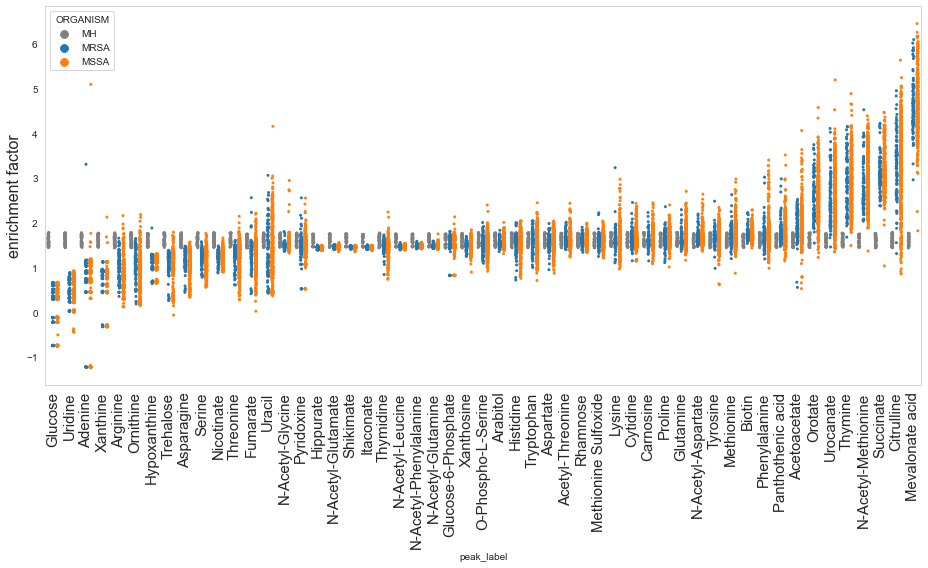

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['gray',"#1f77b4","#ff7f0e"]
sns.set_palette(sns.color_palette(colors))

cc_value1 = cc_value.copy()
cc_value1['value'] = cc_value1['value'].apply(lambda x: durbin(x,20))


sns.set_style("whitegrid")
fig = plt.figure(figsize=(13,8))
# dat = cc_value1[(cc_value1.ORGANISM == 'MSSA') | (cc_value1.ORGANISM == 'MRSA') | (cc_value1.ORGANISM == 'MH')].dropna()
dat = cc_value[(cc_value.ORGANISM == 'MSSA') | (cc_value.ORGANISM == 'MRSA') | (cc_value.ORGANISM == 'MH')].dropna()

ax = sns.stripplot(y='Dvalue', x='peak_label', data=dat, hue='ORGANISM', edgecolor='white', s=3, dodge=True)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize = 15)
# ax = sns.violinplot(y="Ornithine", x="ORGANISM", data=dat, color = 'gray')
# plt.yscale('log')
plt.grid(False)
handles, labels = ax.get_legend_handles_labels()
plt.ylabel('enrichment factor', fontsize = 16)
plt.tight_layout()
# plt.savefig('mrsa_vs_mssa_consumption_lower_point_size3_with_DT10_on_zscore.pdf')
plt.show()